<a href="https://colab.research.google.com/github/UdaniS02/ML_CW/blob/main/CW_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cell 1: Install** **Packages**

In [1]:
#Install Packages
!pip install -q scikit-learn pandas numpy matplotlib seaborn tensorflow

print("All packages installed successfully!")

All packages installed successfully!


**Cell 2: Import** **Libraries**

In [2]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, accuracy_score,
                            precision_score, recall_score, f1_score)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported!")
print(f"TensorFlow version: {tf.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

All libraries imported!
TensorFlow version: 2.19.0
Pandas version: 2.2.2
NumPy version: 2.0.2


**Cell 3: Load Dataset**

In [4]:
# Load the Telco Customer Churn dataset

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("\nDataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Dataset loaded successfully!
Shape: (7043, 21)
Rows: 7043, Columns: 21


### **TASK 1: EXPLORATORY DATA ANALYSIS**

**Cell 4: Basic Dataset Information**

In [5]:
print("="*80)
print("TASK 1: EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n1. DATASET OVERVIEW")
print("-"*80)
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\nFirst 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

TASK 1: EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW
--------------------------------------------------------------------------------
Number of Rows: 7043
Number of Columns: 21

Column Names and Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Last 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


**Cell 5: Missing Values Analysis**

In [6]:
print("\n2. MISSING VALUES ANALYSIS")
print("-"*80)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percentage.values
})

print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("No missing values found!")
else:
    print(f"\nTotal missing values: {missing_df['Missing Count'].sum()}")


2. MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------
Empty DataFrame
Columns: [Column, Missing Count, Percentage]
Index: []
No missing values found!


**Cell 6: Statistical Summary**

In [7]:
print("\n3. STATISTICAL SUMMARY")
print("-"*80)

# Convert TotalCharges to numeric (it might be stored as object)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("\nNumerical Features Summary:")
display(df.describe())

print("\nCategorical Features Summary:")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Number of categorical features: {len(categorical_cols)}")
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head())


3. STATISTICAL SUMMARY
--------------------------------------------------------------------------------

Numerical Features Summary:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000



Categorical Features Summary:
Number of categorical features: 17

customerID: 7043 unique values
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
Name: count, dtype: int64

gender: 2 unique values
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner: 2 unique values
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents: 2 unique values
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService: 2 unique values
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines: 3 unique values
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService: 3 unique values
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity: 3 unique values
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, d

**Cell 7: Target Variable Analysis**


4. TARGET VARIABLE DISTRIBUTION
--------------------------------------------------------------------------------
Churn Distribution:
  No:   5174 (73.46%)
  Yes:  1869 (26.54%)


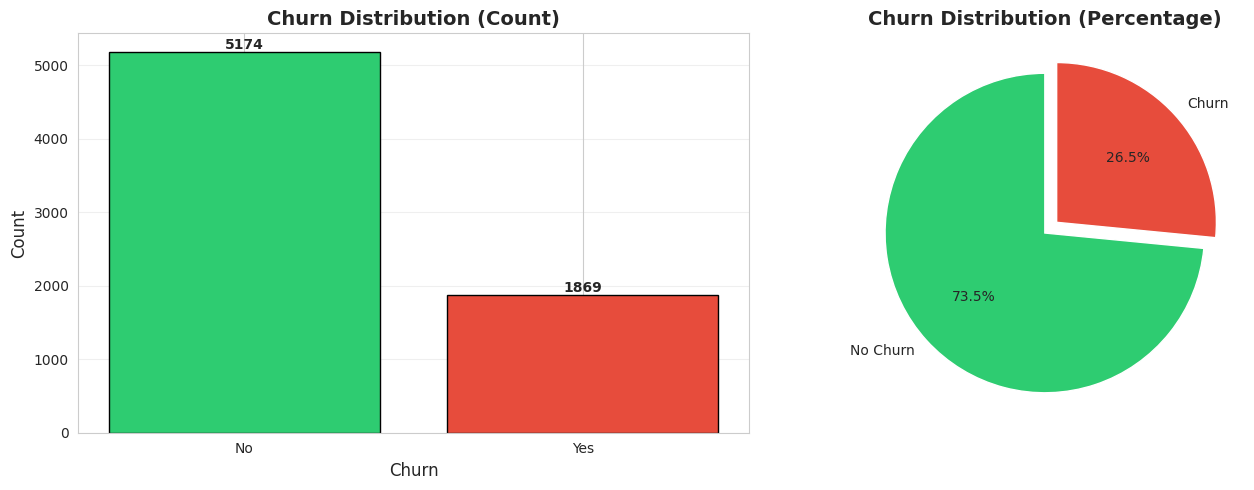


INSIGHT: Class imbalance detected - will need stratified split and class weights!


In [8]:
print("\n4. TARGET VARIABLE DISTRIBUTION")
print("-"*80)

churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(f"  No:  {churn_counts['No']:>5} ({churn_percentage['No']:>5.2f}%)")
print(f"  Yes: {churn_counts['Yes']:>5} ({churn_percentage['Yes']:>5.2f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['No', 'Yes'], churn_counts.values, color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')
# Pie chart
axes[1].pie(churn_counts.values, labels=['No Churn', 'Churn'],
           autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'],
           startangle=90, explode=(0, 0.1))
axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nINSIGHT: Class imbalance detected - will need stratified split and class weights!")

**Cell 8: Numerical Features Analysis**


5. NUMERICAL FEATURES ANALYSIS
--------------------------------------------------------------------------------
Statistical Summary of Numerical Features:


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


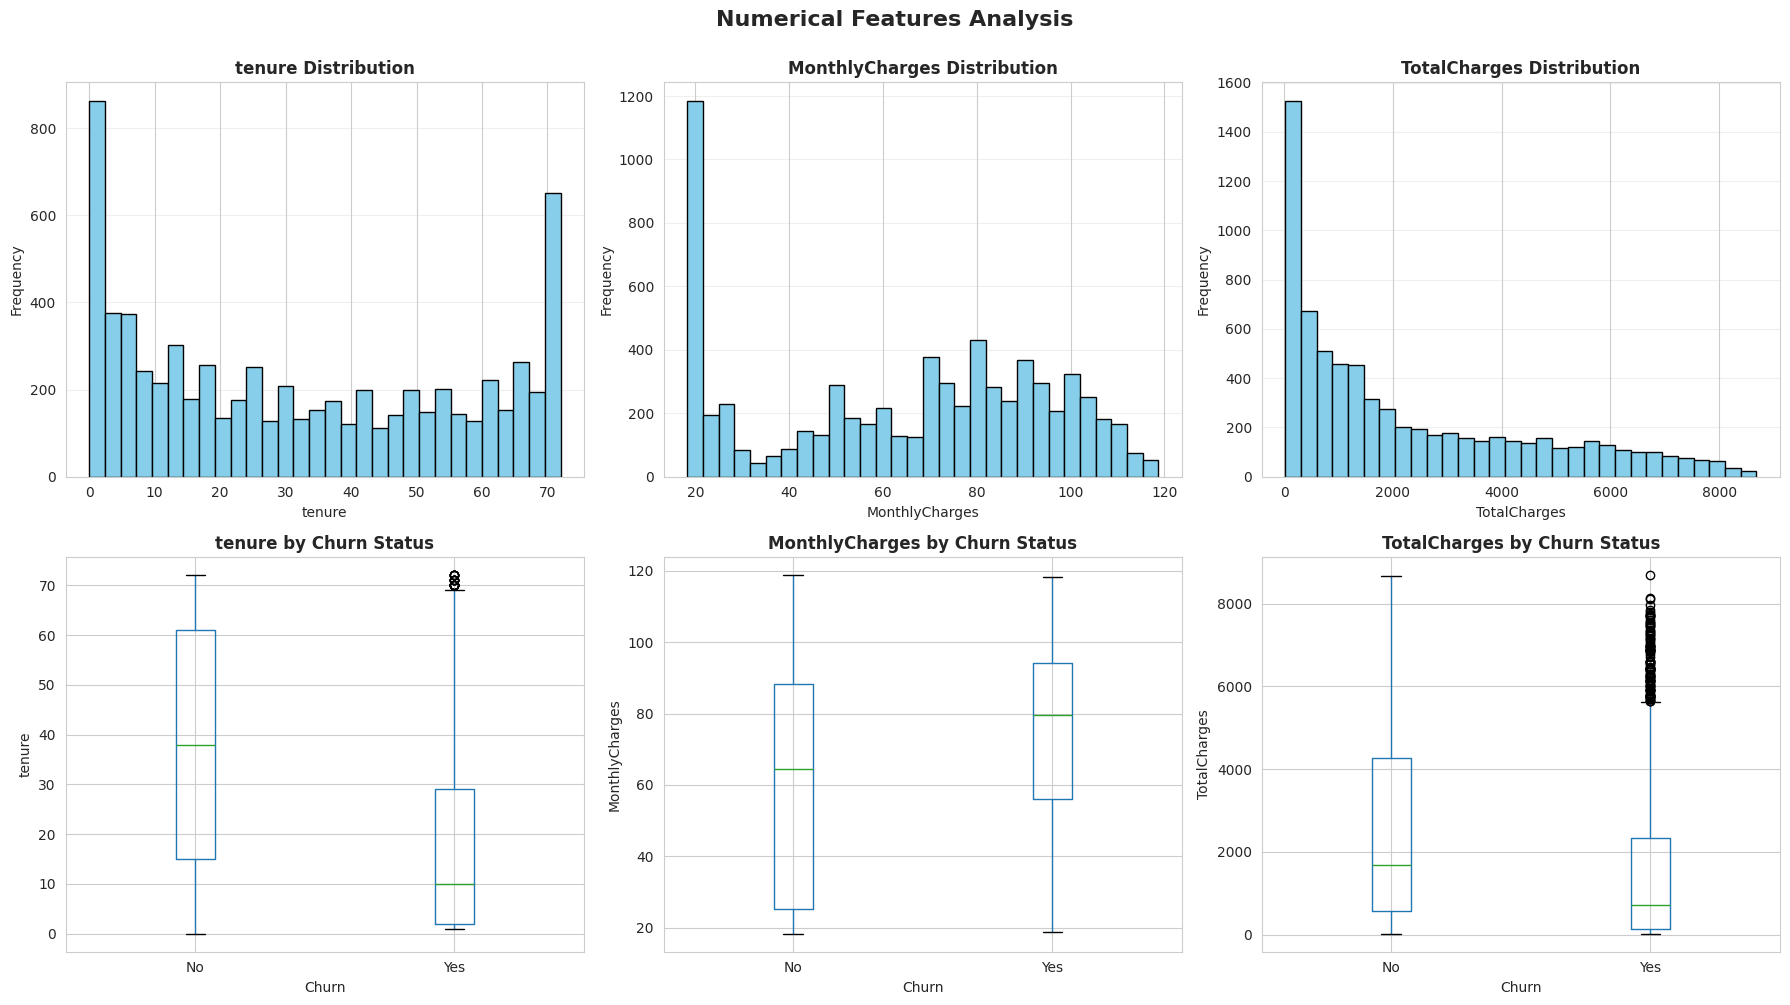


INSIGHTS:
  - Shorter tenure customers tend to churn more
  - Higher monthly charges associated with churn
  - TotalCharges correlates with tenure


In [9]:
print("\n5. NUMERICAL FEATURES ANALYSIS")
print("-"*80)

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Statistical Summary of Numerical Features:")
display(df[numerical_cols].describe())

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Distribution plots
for idx, col in enumerate(numerical_cols):
    # Histogram
    axes[0, idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[0, idx].set_title(f'{col} Distribution', fontweight='bold')
    axes[0, idx].set_xlabel(col)
    axes[0, idx].set_ylabel('Frequency')
    axes[0, idx].grid(axis='y', alpha=0.3)

    # Boxplot by Churn
    df.boxplot(column=col, by='Churn', ax=axes[1, idx])
    axes[1, idx].set_title(f'{col} by Churn Status', fontweight='bold')
    axes[1, idx].set_xlabel('Churn')
    axes[1, idx].set_ylabel(col)

plt.suptitle('Numerical Features Analysis', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\nINSIGHTS:")
print("  - Shorter tenure customers tend to churn more")
print("  - Higher monthly charges associated with churn")
print("  - TotalCharges correlates with tenure")

**Cell 9: Correlation Analysis**


6. CORRELATION ANALYSIS
--------------------------------------------------------------------------------
Correlation Matrix:


,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


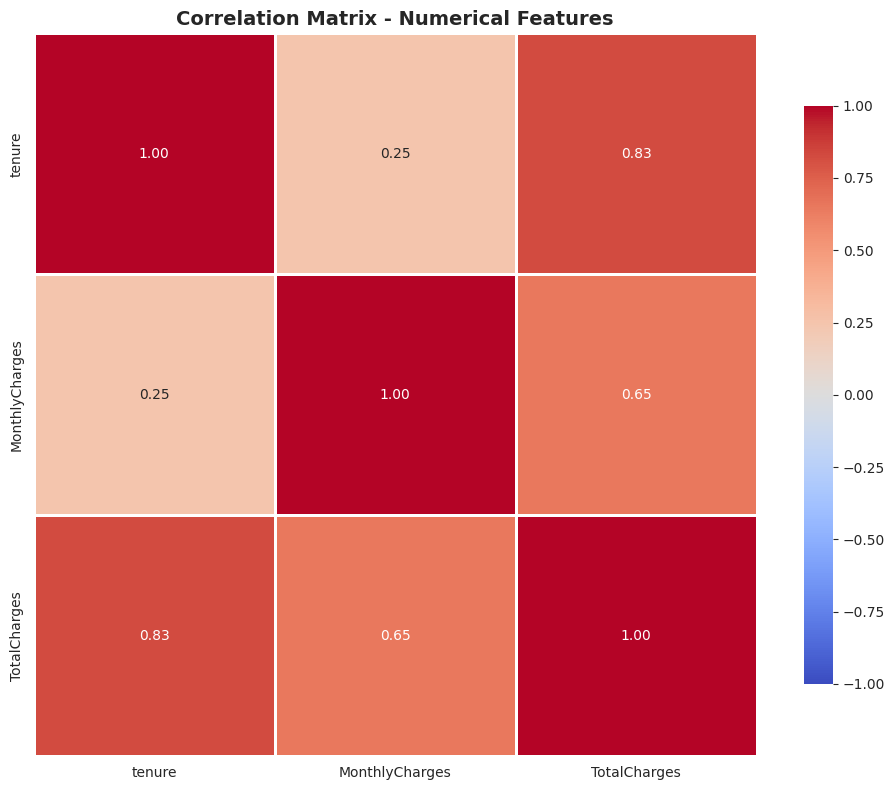


INSIGHT: Tenure and TotalCharges are highly correlated (0.83)


In [10]:
print("\n6. CORRELATION ANALYSIS")
print("-"*80)

# Calculate correlation
correlation_matrix = df[numerical_cols].corr()

print("Correlation Matrix:")
display(correlation_matrix)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
           square=True, linewidths=2, cbar_kws={"shrink": 0.8},
           vmin=-1, vmax=1)
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nINSIGHT: Tenure and TotalCharges are highly correlated (0.83)")

**Cell 10: Categorical Features Analysis**


7. CATEGORICAL FEATURES ANALYSIS
--------------------------------------------------------------------------------


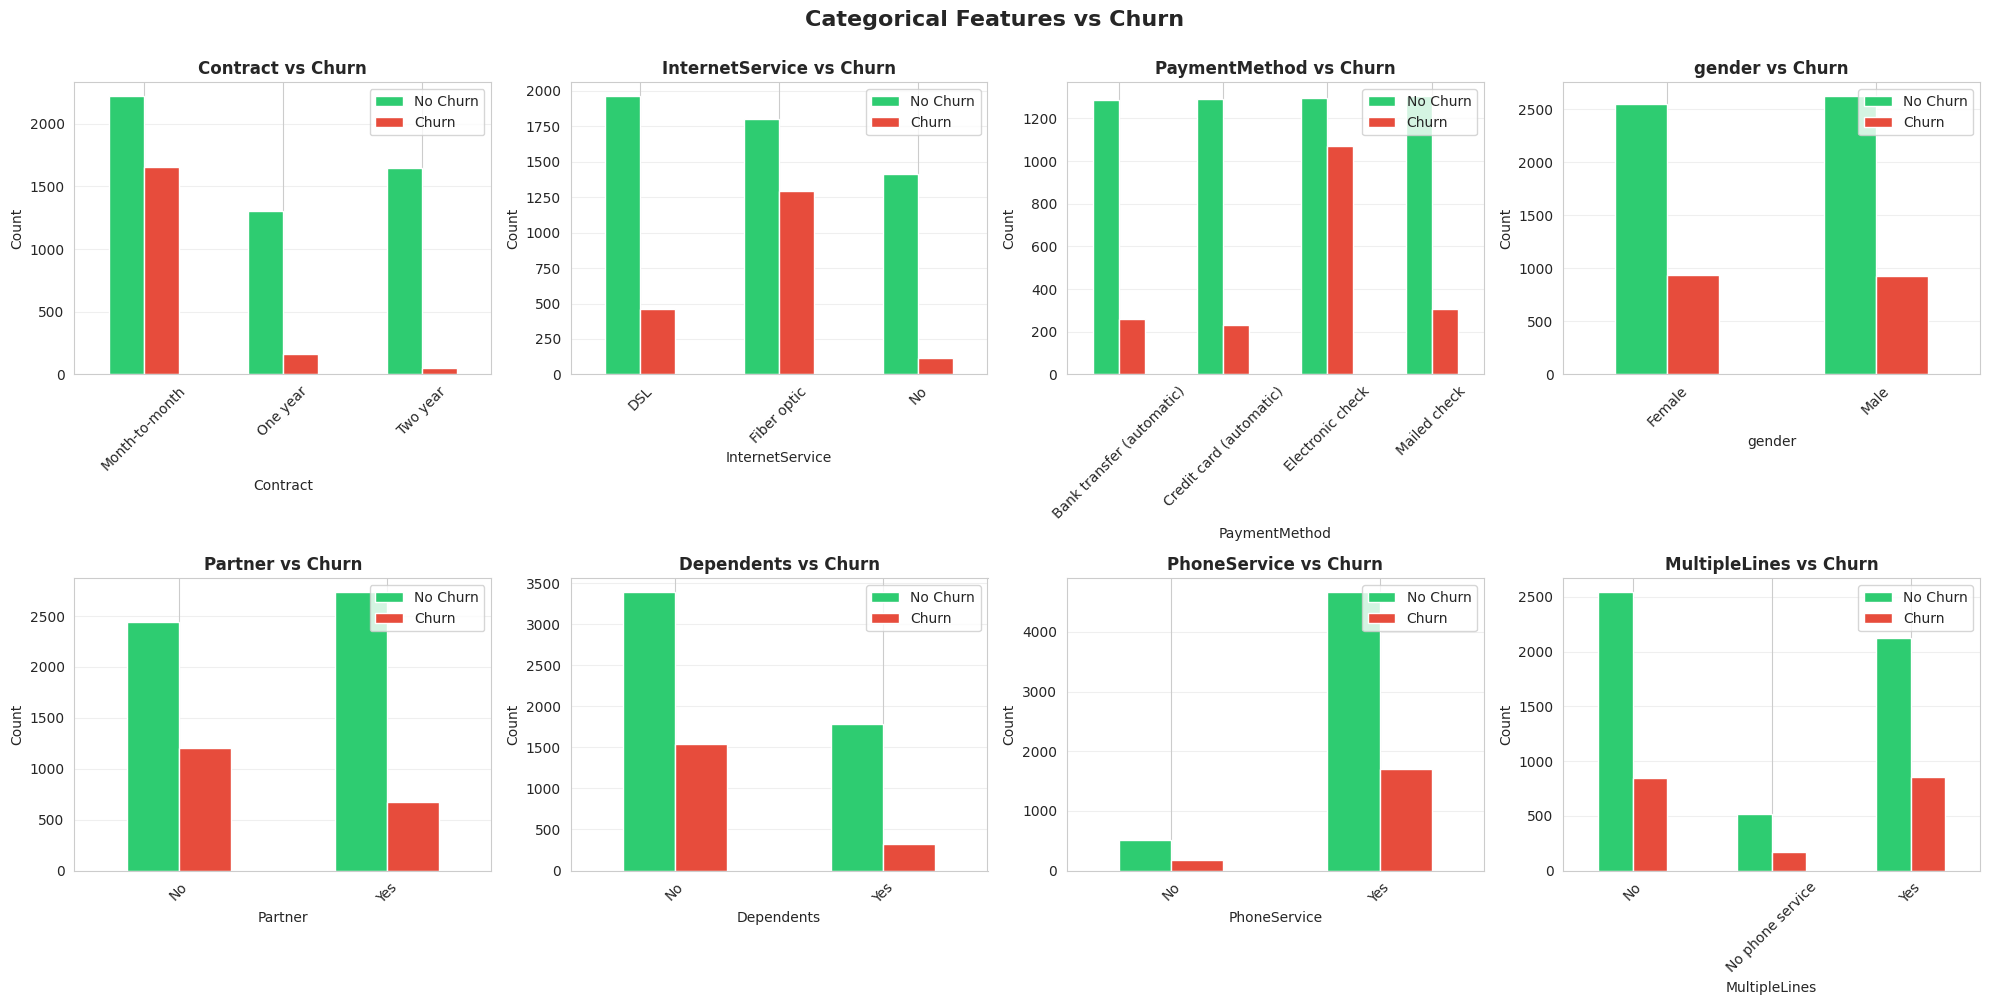

In [11]:
print("\n7. CATEGORICAL FEATURES ANALYSIS")
print("-"*80)

categorical_cols = ['Contract', 'InternetService', 'PaymentMethod', 'gender',
                   'Partner', 'Dependents', 'PhoneService', 'MultipleLines']

# Visualizations
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    churn_by_cat = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    churn_by_cat.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{col} vs Churn', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].legend(['No Churn', 'Churn'], loc='upper right')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Categorical Features vs Churn', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

**Cell 11: Churn Rate by Key Features**

In [12]:
print("\n8. CHURN RATE ANALYSIS BY KEY FEATURES")
print("-"*80)

key_features = ['Contract', 'InternetService', 'PaymentMethod']

for feature in key_features:
    print(f"\nChurn Rate by {feature}:")
    churn_rate = df.groupby(feature)['Churn'].apply(
        lambda x: (x == 'Yes').sum() / len(x) * 100
    ).sort_values(ascending=False)

    for category, rate in churn_rate.items():
        print(f"  {category:30s}: {rate:>6.2f}%")

print("\nKEY INSIGHTS:")
print("  1. Month-to-month contracts have HIGHEST churn rate")
print("  2. Fiber optic users churn more than DSL users")
print("  3. Electronic check payment method shows higher churn")


8. CHURN RATE ANALYSIS BY KEY FEATURES
--------------------------------------------------------------------------------

Churn Rate by Contract:
  Month-to-month                :  42.71%
  One year                      :  11.27%
  Two year                      :   2.83%

Churn Rate by InternetService:
  Fiber optic                   :  41.89%
  DSL                           :  18.96%
  No                            :   7.40%

Churn Rate by PaymentMethod:
  Electronic check              :  45.29%
  Mailed check                  :  19.11%
  Bank transfer (automatic)     :  16.71%
  Credit card (automatic)       :  15.24%

KEY INSIGHTS:
  1. Month-to-month contracts have HIGHEST churn rate
  2. Fiber optic users churn more than DSL users
  3. Electronic check payment method shows higher churn


**Cell 12: EDA Summary**

In [13]:
print("\n" + "="*80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

insights = [
    "1. CLASS IMBALANCE: 73.5% No Churn, 26.5% Churn - Need stratified split",
    "2. TENURE: Shorter tenure (<12 months) strongly associated with churn",
    "3. CONTRACT TYPE: Month-to-month contracts have highest churn rate (~42%)",
    "4. INTERNET SERVICE: Fiber optic users show 2x higher churn than DSL",
    "5. PAYMENT METHOD: Electronic check users have higher churn (~45%)",
    "6. MONTHLY CHARGES: Higher charges correlate with increased churn",
    "7. SERVICES: Customers without additional services (OnlineSecurity, TechSupport) churn more",
    "8. MISSING DATA: TotalCharges has 11 missing values (need imputation)"
]

for insight in insights:
    print(insight)

print("="*80)
print("TASK 1 COMPLETE - EDA DONE!")
print("="*80)


KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS
1. CLASS IMBALANCE: 73.5% No Churn, 26.5% Churn - Need stratified split
2. TENURE: Shorter tenure (<12 months) strongly associated with churn
3. CONTRACT TYPE: Month-to-month contracts have highest churn rate (~42%)
4. INTERNET SERVICE: Fiber optic users show 2x higher churn than DSL
5. PAYMENT METHOD: Electronic check users have higher churn (~45%)
6. MONTHLY CHARGES: Higher charges correlate with increased churn
7. SERVICES: Customers without additional services (OnlineSecurity, TechSupport) churn more
8. MISSING DATA: TotalCharges has 11 missing values (need imputation)
TASK 1 COMPLETE - EDA DONE!


## **TASK 2: MODEL IMPLEMENTATION**

### **Part 1: Data Preprocessing**

**Cell 13: Handle Missing Values**

In [14]:
print("\n" + "="*80)
print("TASK 2 - PART 1: DATA PREPROCESSING")
print("="*80)

print("\n1. HANDLING MISSING VALUES")
print("-"*80)

# Convert TotalCharges to numeric and check missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
missing_count = df['TotalCharges'].isnull().sum()

print(f"Missing values in TotalCharges: {missing_count}")

# Impute with median
median_value = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_value, inplace=True)

print(f"Imputed with median: {median_value:.2f}")
print(f"Missing values after imputation: {df['TotalCharges'].isnull().sum()}")


TASK 2 - PART 1: DATA PREPROCESSING

1. HANDLING MISSING VALUES
--------------------------------------------------------------------------------
Missing values in TotalCharges: 11
Imputed with median: 1397.47
Missing values after imputation: 0


**Cell 14: Drop Non-Predictive Features**

In [15]:
print("\n2. REMOVING NON-PREDICTIVE FEATURES")
print("-"*80)

# Create a copy for preprocessing
df_processed = df.copy()

# Drop customerID (not predictive)
df_processed = df_processed.drop(['customerID'], axis=1)

print(f"Dropped customerID")
print(f"Remaining columns: {df_processed.shape[1]}")
print(f"Features: {list(df_processed.columns)}")


2. REMOVING NON-PREDICTIVE FEATURES
--------------------------------------------------------------------------------
Dropped customerID
Remaining columns: 20
Features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


**Cell 15: Encode Target Variable**

In [16]:
print("\n3. ENCODING TARGET VARIABLE")
print("-"*80)

# Encode Churn: No=0, Yes=1
le_target = LabelEncoder()
df_processed['Churn'] = le_target.fit_transform(df_processed['Churn'])

print("Target Variable Encoding:")
print("  No  -> 0")
print("  Yes -> 1")
print(f"\nValue counts after encoding:")
print(df_processed['Churn'].value_counts().sort_index())


3. ENCODING TARGET VARIABLE
--------------------------------------------------------------------------------
Target Variable Encoding:
  No  -> 0
  Yes -> 1

Value counts after encoding:
Churn
0    5174
1    1869
Name: count, dtype: int64


**Cell 16: Encode Categorical Features**

In [17]:
print("\n4. ENCODING CATEGORICAL FEATURES")
print("-"*80)

# Binary encoding for binary features
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

print("Binary Encoding (0/1):")
for col in binary_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map({
            'Yes': 1, 'No': 0,
            'Male': 1, 'Female': 0
        })
        print(f"   {col}")

# SeniorCitizen is already 0/1
print(f"   SeniorCitizen (already numeric)")

# One-Hot Encoding for multi-category features
multi_category_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                      'OnlineBackup', 'DeviceProtection', 'TechSupport',
                      'StreamingTV', 'StreamingMovies', 'Contract',
                      'PaymentMethod']

print(f"\nOne-Hot Encoding ({len(multi_category_cols)} features):")
df_encoded = pd.get_dummies(df_processed, columns=multi_category_cols, drop_first=True)

print(f"   Encoded {len(multi_category_cols)} categorical features")
print(f"\nShape after encoding: {df_encoded.shape}")
print(f"Total features: {df_encoded.shape[1] - 1} (excluding target)")


4. ENCODING CATEGORICAL FEATURES
--------------------------------------------------------------------------------
Binary Encoding (0/1):
   gender
   Partner
   Dependents
   PhoneService
   PaperlessBilling
   SeniorCitizen (already numeric)

One-Hot Encoding (10 features):
   Encoded 10 categorical features

Shape after encoding: (7043, 31)
Total features: 30 (excluding target)


**Cell 17: Split Features and Target**

In [18]:
print("\n5. SEPARATING FEATURES AND TARGET")
print("-"*80)

# Separate features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature names: {list(X.columns[:10])}... (showing first 10)")
print(f"\nTarget distribution:")
print(f"  No Churn (0): {(y == 0).sum()} ({(y == 0).sum()/len(y)*100:.2f}%)")
print(f"  Churn (1):    {(y == 1).sum()} ({(y == 1).sum()/len(y)*100:.2f}%)")


5. SEPARATING FEATURES AND TARGET
--------------------------------------------------------------------------------
Features (X) shape: (7043, 30)
Target (y) shape: (7043,)

Feature names: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service']... (showing first 10)

Target distribution:
  No Churn (0): 5174 (73.46%)
  Churn (1):    1869 (26.54%)


**Cell 18: Train-Test Split**

In [19]:
print("\n6. TRAIN-TEST SPLIT (STRATIFIED)")
print("-"*80)

# Split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:     {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nClass distribution in training set:")
train_dist = y_train.value_counts(normalize=True) * 100
print(f"  No Churn (0): {(y_train == 0).sum()} ({train_dist[0]:.2f}%)")
print(f"  Churn (1):    {(y_train == 1).sum()} ({train_dist[1]:.2f}%)")

print(f"\nClass distribution in test set:")
test_dist = y_test.value_counts(normalize=True) * 100
print(f"  No Churn (0): {(y_test == 0).sum()} ({test_dist[0]:.2f}%)")
print(f"  Churn (1):    {(y_test == 1).sum()} ({test_dist[1]:.2f}%)")

print("\n Stratification successful - distributions match!")


6. TRAIN-TEST SPLIT (STRATIFIED)
--------------------------------------------------------------------------------
Training set: 5634 samples (80.0%)
Test set:     1409 samples (20.0%)

Class distribution in training set:
  No Churn (0): 4139 (73.46%)
  Churn (1):    1495 (26.54%)

Class distribution in test set:
  No Churn (0): 1035 (73.46%)
  Churn (1):    374 (26.54%)

 Stratification successful - distributions match!


**Cell 19: Feature Scaling**

In [20]:
print("\n7. FEATURE SCALING (STANDARDIZATION)")
print("-"*80)

# Apply StandardScaler (z-score normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("StandardScaler applied: X_scaled = (X - μ) / σ")
print(f"\nTraining set after scaling:")
print(f"  Mean: {X_train_scaled.mean():.6f} (should be ≈ 0)")
print(f"  Std:  {X_train_scaled.std():.6f} (should be ≈ 1)")

print(f"\nTest set after scaling:")
print(f"  Mean: {X_test_scaled.mean():.6f}")
print(f"  Std:  {X_test_scaled.std():.6f}")

print("\n Feature scaling complete!")


7. FEATURE SCALING (STANDARDIZATION)
--------------------------------------------------------------------------------
StandardScaler applied: X_scaled = (X - μ) / σ

Training set after scaling:
  Mean: -0.000000 (should be ≈ 0)
  Std:  1.000000 (should be ≈ 1)

Test set after scaling:
  Mean: -0.006579
  Std:  0.995434

 Feature scaling complete!


**Cell 20: Handle Class Imbalance**

In [21]:
print("\n8. HANDLING CLASS IMBALANCE")
print("-"*80)

# Compute class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print("Class Weights (Balanced):")
print(f"  Class 0 (No Churn): {class_weights[0]:.4f}")
print(f"  Class 1 (Churn):    {class_weights[1]:.4f}")
print(f"\nRatio: {class_weights[1]/class_weights[0]:.2f}x more weight for minority class")

print("\n" + "="*80)
print("DATA PREPROCESSING COMPLETE!")
print("="*80)
print(f"Ready for model training:")
print(f"  - Training samples: {X_train_scaled.shape[0]}")
print(f"  - Test samples: {X_test_scaled.shape[0]}")
print(f"  - Features: {X_train_scaled.shape[1]}")
print(f"  - Class weights: Applied")
print(f"  - Feature scaling: Done")
print("="*80)


8. HANDLING CLASS IMBALANCE
--------------------------------------------------------------------------------
Class Weights (Balanced):
  Class 0 (No Churn): 0.6806
  Class 1 (Churn):    1.8843

Ratio: 2.77x more weight for minority class

DATA PREPROCESSING COMPLETE!
Ready for model training:
  - Training samples: 5634
  - Test samples: 1409
  - Features: 30
  - Class weights: Applied
  - Feature scaling: Done


### **Part 2: Model Implementation**

**Neural Network Model**

**Cell 21: Build Neural Network Architecture**

In [22]:
print("\n" + "="*80)
print("TASK 2 - PART 2A: NEURAL NETWORK IMPLEMENTATION")
print("="*80)

print("\n1. BUILDING NEURAL NETWORK ARCHITECTURE")
print("-"*80)

def create_nn_model(input_dim):
    """
    Create a Neural Network for binary classification

    Architecture:
    - Input Layer: input_dim features
    - Hidden Layer 1: 128 neurons + ReLU + BatchNorm + Dropout(0.3)
    - Hidden Layer 2: 64 neurons + ReLU + BatchNorm + Dropout(0.3)
    - Hidden Layer 3: 32 neurons + ReLU + BatchNorm + Dropout(0.2)
    - Hidden Layer 4: 16 neurons + ReLU + Dropout(0.2)
    - Output Layer: 1 neuron + Sigmoid
    """
    model = Sequential([
        # Layer 1
        Dense(128, activation='relu', input_dim=input_dim,
             kernel_initializer='he_normal', name='hidden_1'),
        BatchNormalization(),
        Dropout(0.3),

        # Layer 2
        Dense(64, activation='relu', kernel_initializer='he_normal', name='hidden_2'),
        BatchNormalization(),
        Dropout(0.3),

        # Layer 3
        Dense(32, activation='relu', kernel_initializer='he_normal', name='hidden_3'),
        BatchNormalization(),
        Dropout(0.2),

        # Layer 4
        Dense(16, activation='relu', kernel_initializer='he_normal', name='hidden_4'),
        Dropout(0.2),

        # Output Layer
        Dense(1, activation='sigmoid', name='output')
    ])

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy',
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall'),
                tf.keras.metrics.AUC(name='auc')]
    )

    return model

# Create model
nn_model = create_nn_model(X_train_scaled.shape[1])

print("Neural Network Architecture:")
print("-"*80)
nn_model.summary()

print("\nHyperparameters:")
print("  - Optimizer: Adam (lr=0.001)")
print("  - Loss: Binary Crossentropy")
print("  - Batch Size: 32")
print("  - Max Epochs: 100 (with early stopping)")
print("  - Dropout: 0.3, 0.3, 0.2, 0.2")


TASK 2 - PART 2A: NEURAL NETWORK IMPLEMENTATION

1. BUILDING NEURAL NETWORK ARCHITECTURE
--------------------------------------------------------------------------------
Neural Network Architecture:
--------------------------------------------------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_4 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,745 (61.50 KB)

 Trainable params: 15,297 (59.75 KB)

 Non-trainable params: 448 (1.75 KB)


Hyperparameters:
  - Optimizer: Adam (lr=0.001)
  - Loss: Binary Crossentropy
  - Batch Size: 32
  - Max Epochs: 100 (with early stopping)
  - Dropout: 0.3, 0.3, 0.2, 0.2


**Cell 22: Define Callbacks**

In [23]:
print("\n2. DEFINING CALLBACKS FOR TRAINING")
print("-"*80)

# Early Stopping: Stop if validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1,
    mode='min'
)

# Reduce Learning Rate: Reduce LR when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1,
    mode='min'
)

print("Callbacks configured:")
print("   EarlyStopping:")
print("      - Monitor: val_loss")
print("      - Patience: 15 epochs")
print("      - Restores best weights")
print("\n   ReduceLROnPlateau:")
print("      - Monitor: val_loss")
print("      - Factor: 0.5 (halves learning rate)")
print("      - Patience: 5 epochs")
print("      - Min LR: 0.00001")


2. DEFINING CALLBACKS FOR TRAINING
--------------------------------------------------------------------------------
Callbacks configured:
   EarlyStopping:
      - Monitor: val_loss
      - Patience: 15 epochs
      - Restores best weights

   ReduceLROnPlateau:
      - Monitor: val_loss
      - Factor: 0.5 (halves learning rate)
      - Patience: 5 epochs
      - Min LR: 0.00001


**Cell 23: Train Neural Network**

In [24]:
print("\n3. TRAINING NEURAL NETWORK")
print("-"*80)
print("Training in progress... (this may take 2-5 minutes)")
print("-"*80)

# Train model
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr],
    verbose=1  # Show progress
)

print("\n" + "="*80)
print(" NEURAL NETWORK TRAINING COMPLETE!")
print("="*80)
print(f"Total epochs trained: {len(history.history['loss'])}")
print(f"Best validation loss: {min(history.history['val_loss']):.4f}")
print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")


3. TRAINING NEURAL NETWORK
--------------------------------------------------------------------------------
Training in progress... (this may take 2-5 minutes)
--------------------------------------------------------------------------------
Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5236 - auc: 0.6196 - loss: 0.7727 - precision: 0.3338 - recall: 0.7377 - val_accuracy: 0.7001 - val_auc: 0.7950 - val_loss: 0.5413 - val_precision: 0.4566 - val_recall: 0.7661 - learning_rate: 0.0010
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6784 - auc: 0.7663 - loss: 0.6045 - precision: 0.4539 - recall: 0.7558 - val_accuracy: 0.7205 - val_auc: 0.8142 - val_loss: 0.5263 - val_precision: 0.4793 - val_recall: 0.7864 - learning_rate: 0.0010
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7199 - auc: 0.8033 - loss: 0.5428 - precision: 0.4869 - recall: 0.7799 - val_accuracy: 0.7116 - val_auc: 0.8164 - val_loss: 0.5184 - val_precision: 0.4699 - 

**Cell 24: Visualize Training History**


4. VISUALIZING TRAINING HISTORY
--------------------------------------------------------------------------------


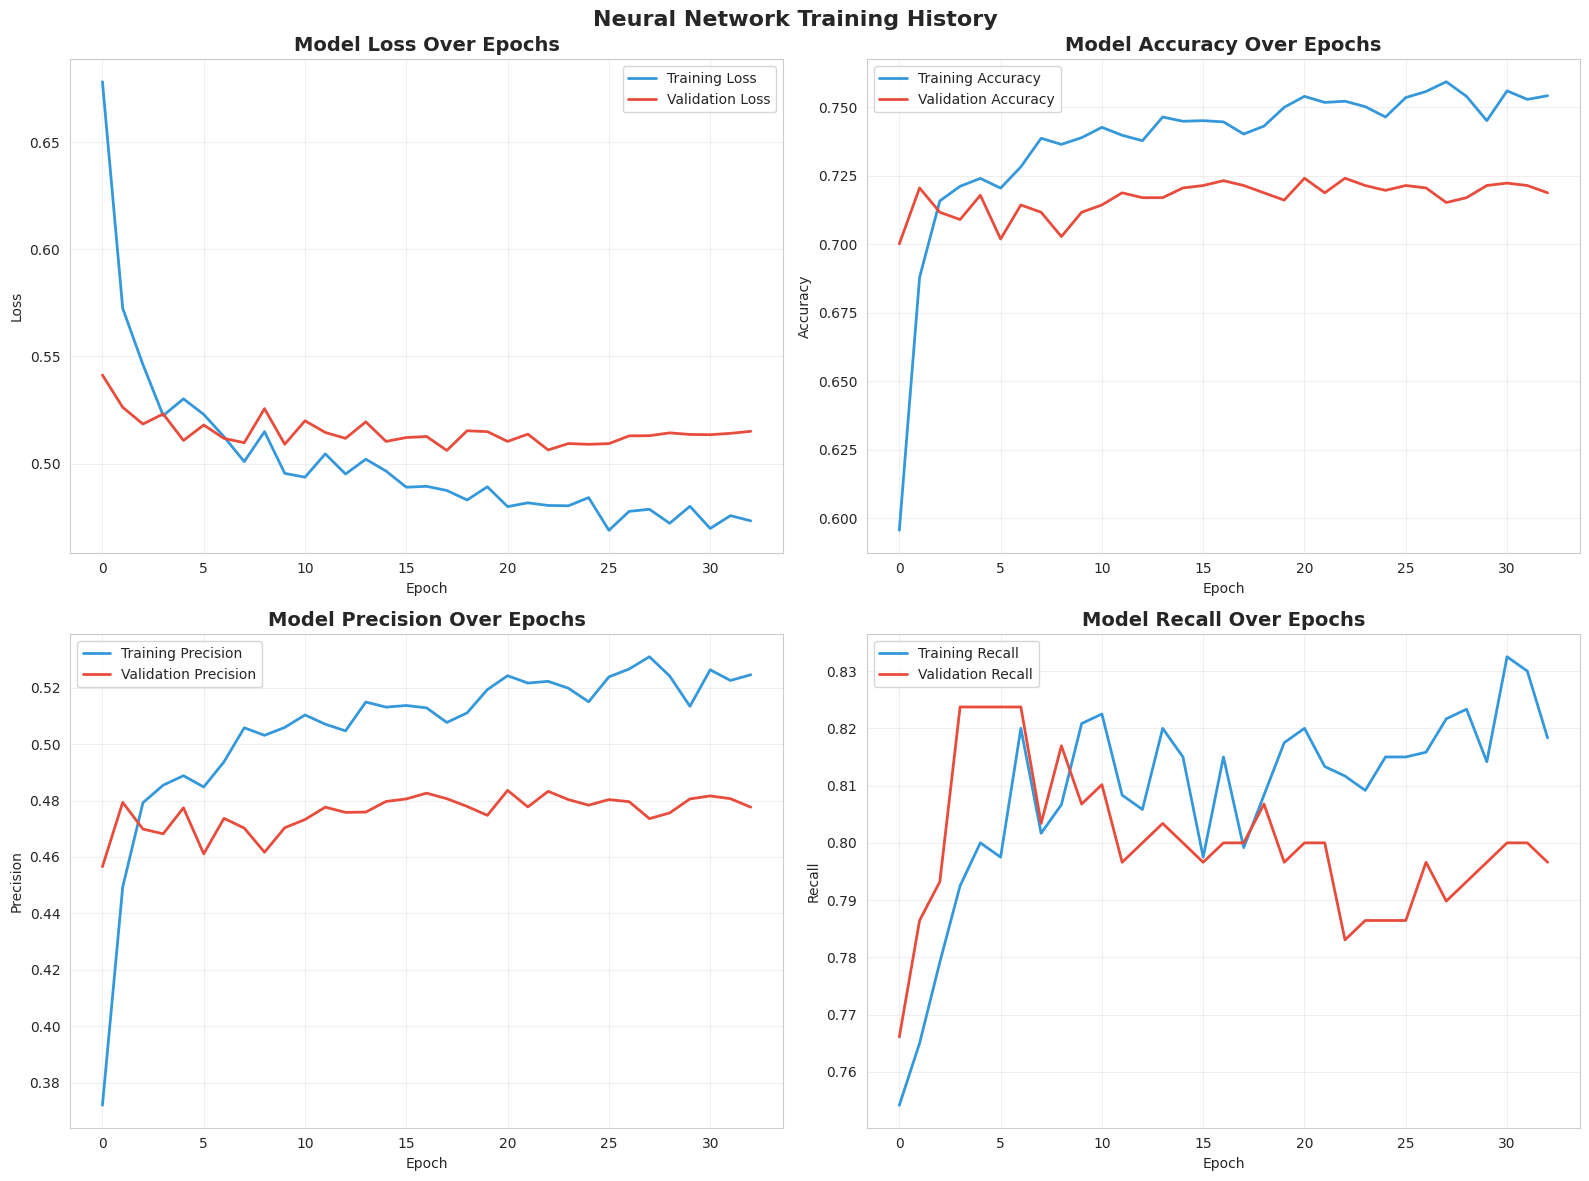

Training curves show model converged successfully!


In [25]:
print("\n4. VISUALIZING TRAINING HISTORY")
print("-"*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Loss
axes[0, 0].plot(history.history['loss'], label='Training Loss', linewidth=2, color='#3498db')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='#e74c3c')
axes[0, 0].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, color='#3498db')
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='#e74c3c')
axes[0, 1].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Precision
axes[1, 0].plot(history.history['precision'], label='Training Precision', linewidth=2, color='#3498db')
axes[1, 0].plot(history.history['val_precision'], label='Validation Precision', linewidth=2, color='#e74c3c')
axes[1, 0].set_title('Model Precision Over Epochs', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Recall
axes[1, 1].plot(history.history['recall'], label='Training Recall', linewidth=2, color='#3498db')
axes[1, 1].plot(history.history['val_recall'], label='Validation Recall', linewidth=2, color='#e74c3c')
axes[1, 1].set_title('Model Recall Over Epochs', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Neural Network Training History', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Training curves show model converged successfully!")

**Cell 25: Neural Network Predictions and Evaluation**

In [26]:
print("\n5. NEURAL NETWORK PREDICTIONS AND EVALUATION")
print("-"*80)

# Make predictions on test set
y_pred_proba_nn = nn_model.predict(X_test_scaled, verbose=0).flatten()
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)

print(f"Predictions generated for {len(y_pred_nn)} test samples")

# Calculate metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)

print("\n" + "="*80)
print("NEURAL NETWORK RESULTS")
print("="*80)

print("\nConfusion Matrix:")
print(cm_nn)
print(f"\nTrue Negatives (TN):  {cm_nn[0, 0]}")
print(f"False Positives (FP): {cm_nn[0, 1]}")
print(f"False Negatives (FN): {cm_nn[1, 0]}")
print(f"True Positives (TP):  {cm_nn[1, 1]}")

print("\n" + "-"*80)
print("PERFORMANCE METRICS:")
print("-"*80)
print(f"Accuracy:  {accuracy_nn:.4f} ({accuracy_nn*100:.2f}%)")
print(f"Precision: {precision_nn:.4f} ({precision_nn*100:.2f}%)")
print(f"Recall:    {recall_nn:.4f} ({recall_nn*100:.2f}%)")
print(f"F1-Score:  {f1_nn:.4f}")
print(f"ROC-AUC:   {roc_auc_nn:.4f} ({roc_auc_nn*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn, target_names=['No Churn', 'Churn']))
print("="*80)


5. NEURAL NETWORK PREDICTIONS AND EVALUATION
--------------------------------------------------------------------------------
Predictions generated for 1409 test samples

NEURAL NETWORK RESULTS

Confusion Matrix:
[[733 302]
 [ 78 296]]

True Negatives (TN):  733
False Positives (FP): 302
False Negatives (FN): 78
True Positives (TP):  296

--------------------------------------------------------------------------------
PERFORMANCE METRICS:
--------------------------------------------------------------------------------
Accuracy:  0.7303 (73.03%)
Precision: 0.4950 (49.50%)
Recall:    0.7914 (79.14%)
F1-Score:  0.6091
ROC-AUC:   0.8346 (83.46%)

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.90      0.71      0.79      1035
       Churn       0.49      0.79      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409

**Cell 26: Neural Network Visualizations**


6. NEURAL NETWORK RESULT VISUALIZATIONS
--------------------------------------------------------------------------------


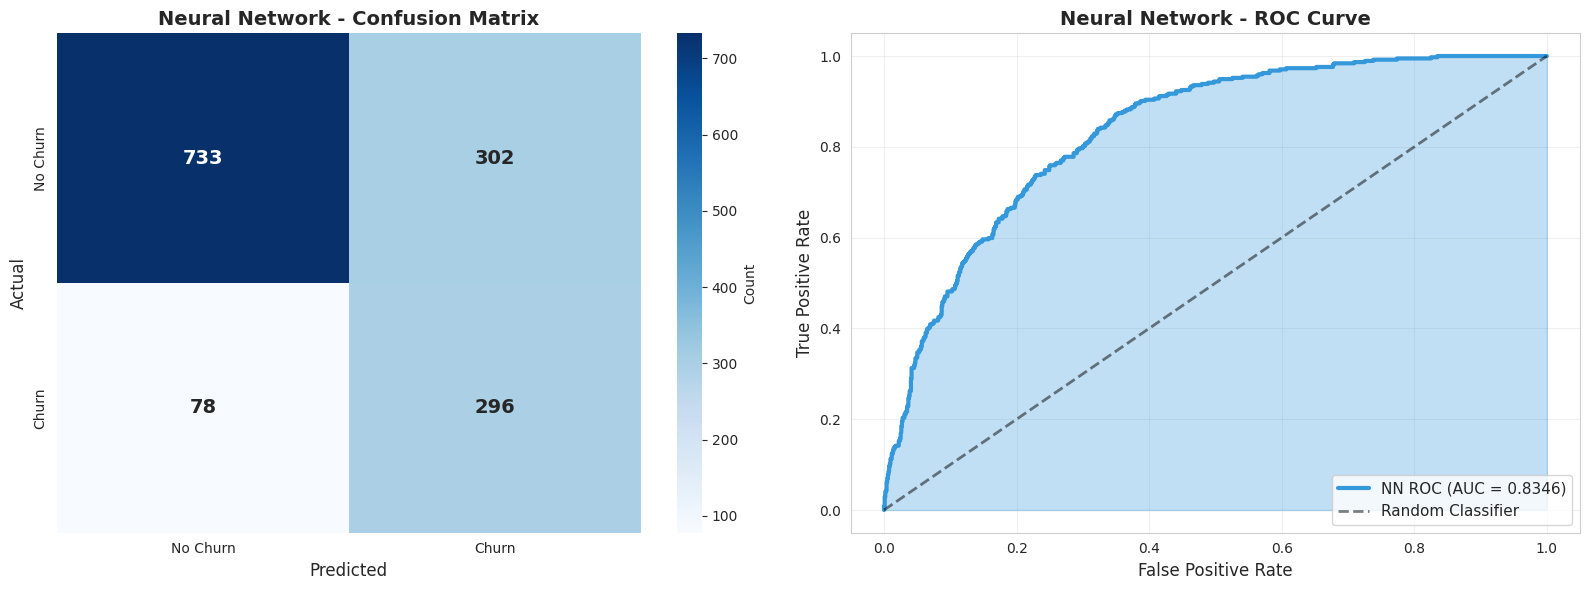

Neural Network evaluation complete!


In [27]:
print("\n6. NEURAL NETWORK RESULT VISUALIZATIONS")
print("-"*80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix Heatmap
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', ax=axes[0],
           cbar_kws={'label': 'Count'},
           xticklabels=['No Churn', 'Churn'],
           yticklabels=['No Churn', 'Churn'],
           annot_kws={'size': 14, 'weight': 'bold'})
axes[0].set_title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# ROC Curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn)
axes[1].plot(fpr_nn, tpr_nn, linewidth=3, label=f'NN ROC (AUC = {roc_auc_nn:.4f})', color='#3498db')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier', alpha=0.5)
axes[1].fill_between(fpr_nn, tpr_nn, alpha=0.3, color='#3498db')
axes[1].set_title('Neural Network - ROC Curve', fontsize=14, fontweight='bold')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc='lower right', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Neural Network evaluation complete!")

**Decision Tree Model**

**Cell 27: Decision Tree Hyperparameter Tuning**

In [28]:
print("\n" + "="*80)
print("TASK 2 - PART 2B: DECISION TREE IMPLEMENTATION")
print("="*80)

print("\n1. HYPERPARAMETER TUNING USING GRID SEARCH")
print("-"*80)

# Define parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None],
    'splitter': ['best', 'random']
}

print("Parameter Grid:")
for param, values in param_grid.items():
    print(f"  {param:20s}: {values}")

print(f"\nTotal combinations: {5 * 4 * 4 * 2 * 2 * 2} = 640")
print("\nStarting GridSearchCV with 5-fold cross-validation...")
print("This may take 3-5 minutes. Please wait...")
print("-"*80)

# Base model
dt_base = DecisionTreeClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # Optimize for ROC-AUC
    n_jobs=-1,  # Use all CPU cores
    verbose=2  # Show progress
)

# Fit
grid_search.fit(X_train, y_train)

print("\n" + "="*80)
print("GRID SEARCH COMPLETE!")
print("="*80)
print(f"\nBest Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param:20s}: {value}")

print(f"\nBest Cross-Validation Score (ROC-AUC): {grid_search.best_score_:.4f}")
print(f"Training Score: {grid_search.best_estimator_.score(X_train, y_train):.4f}")


TASK 2 - PART 2B: DECISION TREE IMPLEMENTATION

1. HYPERPARAMETER TUNING USING GRID SEARCH
--------------------------------------------------------------------------------
Parameter Grid:
  max_depth           : [5, 10, 15, 20, None]
  min_samples_split   : [2, 5, 10, 20]
  min_samples_leaf    : [1, 2, 4, 8]
  criterion           : ['gini', 'entropy']
  class_weight        : ['balanced', None]
  splitter            : ['best', 'random']

Total combinations: 640 = 640

Starting GridSearchCV with 5-fold cross-validation...
This may take 3-5 minutes. Please wait...
--------------------------------------------------------------------------------
Fitting 5 folds for each of 640 candidates, totalling 3200 fits

GRID SEARCH COMPLETE!

Best Parameters:
  class_weight        : balanced
  criterion           : gini
  max_depth           : 5
  min_samples_leaf    : 1
  min_samples_split   : 2
  splitter            : random

Best Cross-Validation Score (ROC-AUC): 0.8278
Training Score: 0.7313


**Cell 28: Train Final Decision Tree Model**

In [29]:
print("\n2. TRAINING FINAL DECISION TREE MODEL")
print("-"*80)

# Get best model from grid search
dt_model = grid_search.best_estimator_

print("Model trained with best parameters:")
print(f"  Tree Depth: {dt_model.get_depth()}")
print(f"  Number of Leaves: {dt_model.get_n_leaves()}")
print(f"  Number of Features: {dt_model.n_features_in_}")

print("\nModel Configuration:")
print(f"  Criterion: {dt_model.criterion}")
print(f"  Splitter: {dt_model.splitter}")
print(f"  Max Depth: {dt_model.max_depth}")
print(f"  Min Samples Split: {dt_model.min_samples_split}")
print(f"  Min Samples Leaf: {dt_model.min_samples_leaf}")
print(f"  Class Weight: {dt_model.class_weight}")


2. TRAINING FINAL DECISION TREE MODEL
--------------------------------------------------------------------------------
Model trained with best parameters:
  Tree Depth: 5
  Number of Leaves: 31
  Number of Features: 30

Model Configuration:
  Criterion: gini
  Splitter: random
  Max Depth: 5
  Min Samples Split: 2
  Min Samples Leaf: 1
  Class Weight: balanced


**Cell 29: Decision Tree Predictions and Evaluation**

In [30]:
print("\n3. DECISION TREE PREDICTIONS AND EVALUATION")
print("-"*80)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

print(f"Predictions generated for {len(y_pred_dt)} test samples")

# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("\n" + "="*80)
print("DECISION TREE RESULTS")
print("="*80)

print("\nConfusion Matrix:")
print(cm_dt)
print(f"\nTrue Negatives (TN):  {cm_dt[0, 0]}")
print(f"False Positives (FP): {cm_dt[0, 1]}")
print(f"False Negatives (FN): {cm_dt[1, 0]}")
print(f"True Positives (TP):  {cm_dt[1, 1]}")

print("\n" + "-"*80)
print("PERFORMANCE METRICS:")
print("-"*80)
print(f"Accuracy:  {accuracy_dt:.4f} ({accuracy_dt*100:.2f}%)")
print(f"Precision: {precision_dt:.4f} ({precision_dt*100:.2f}%)")
print(f"Recall:    {recall_dt:.4f} ({recall_dt*100:.2f}%)")
print(f"F1-Score:  {f1_dt:.4f}")
print(f"ROC-AUC:   {roc_auc_dt:.4f} ({roc_auc_dt*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Churn', 'Churn']))
print("="*80)


3. DECISION TREE PREDICTIONS AND EVALUATION
--------------------------------------------------------------------------------
Predictions generated for 1409 test samples

DECISION TREE RESULTS

Confusion Matrix:
[[724 311]
 [ 75 299]]

True Negatives (TN):  724
False Positives (FP): 311
False Negatives (FN): 75
True Positives (TP):  299

--------------------------------------------------------------------------------
PERFORMANCE METRICS:
--------------------------------------------------------------------------------
Accuracy:  0.7260 (72.60%)
Precision: 0.4902 (49.02%)
Recall:    0.7995 (79.95%)
F1-Score:  0.6077
ROC-AUC:   0.8174 (81.74%)

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.91      0.70      0.79      1035
       Churn       0.49      0.80      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.74      1409



**Cell 30: Feature Importance Analysis**


4. FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------------------------------------
Top 15 Most Important Features:
--------------------------------------------------------------------------------
Contract_Two year                       : 0.4180
Contract_One year                       : 0.2614
InternetService_Fiber optic             : 0.1299
tenure                                  : 0.0811
StreamingMovies_Yes                     : 0.0371
OnlineBackup_No internet service        : 0.0215
PhoneService                            : 0.0129
OnlineSecurity_Yes                      : 0.0088
PaymentMethod_Electronic check          : 0.0079
Dependents                              : 0.0051
gender                                  : 0.0041
OnlineBackup_Yes                        : 0.0036
PaperlessBilling                        : 0.0032
MultipleLines_No phone service          : 0.0023
TotalCharges                            : 0.0017


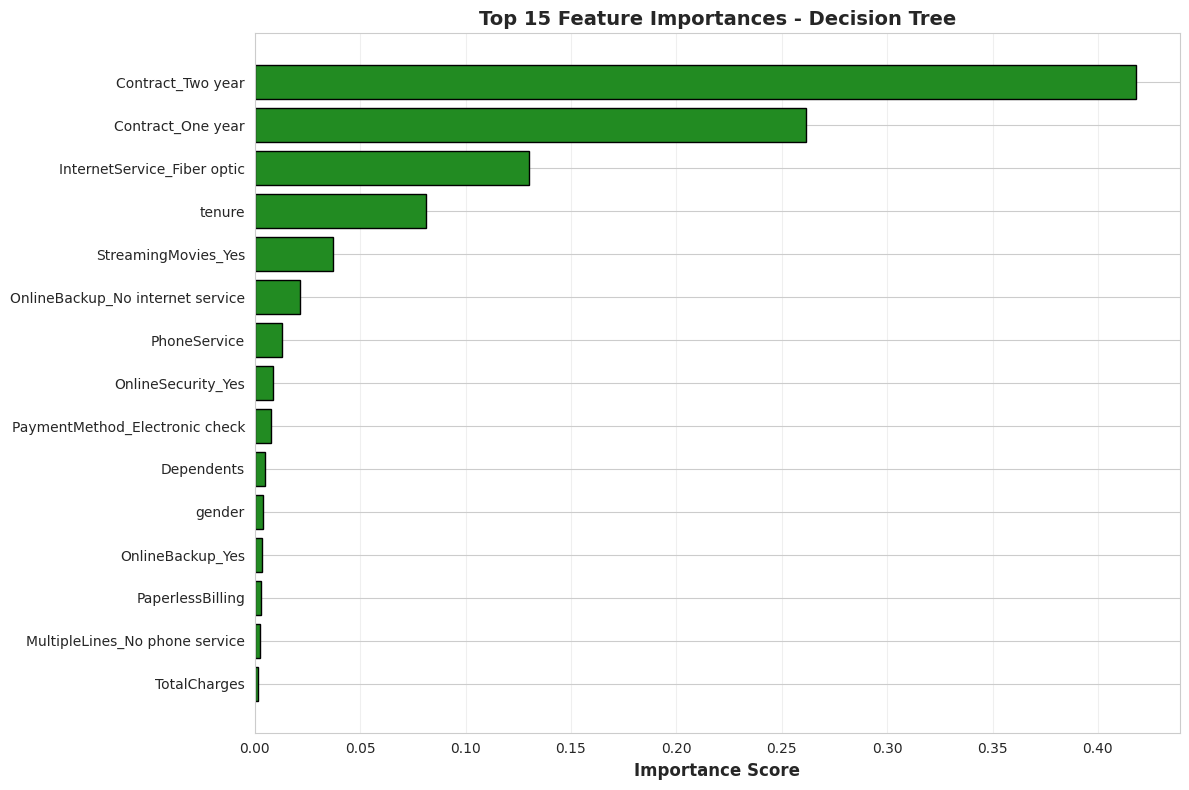


INSIGHTS:
  - Most important features drive churn predictions
  - Can guide business interventions


In [31]:
print("\n4. FEATURE IMPORTANCE ANALYSIS")
print("-"*80)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print("-"*80)
for idx, row in feature_importance.head(15).iterrows():
    print(f"{row['feature']:40s}: {row['importance']:.4f}")

# Visualization
plt.figure(figsize=(12, 8))
plt.barh(feature_importance.head(15)['feature'],
         feature_importance.head(15)['importance'],
         color='forestgreen', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.title('Top 15 Feature Importances - Decision Tree', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nINSIGHTS:")
print("  - Most important features drive churn predictions")
print("  - Can guide business interventions")

**Cell 31: Decision Tree Visualizations**


5. DECISION TREE RESULT VISUALIZATIONS
--------------------------------------------------------------------------------


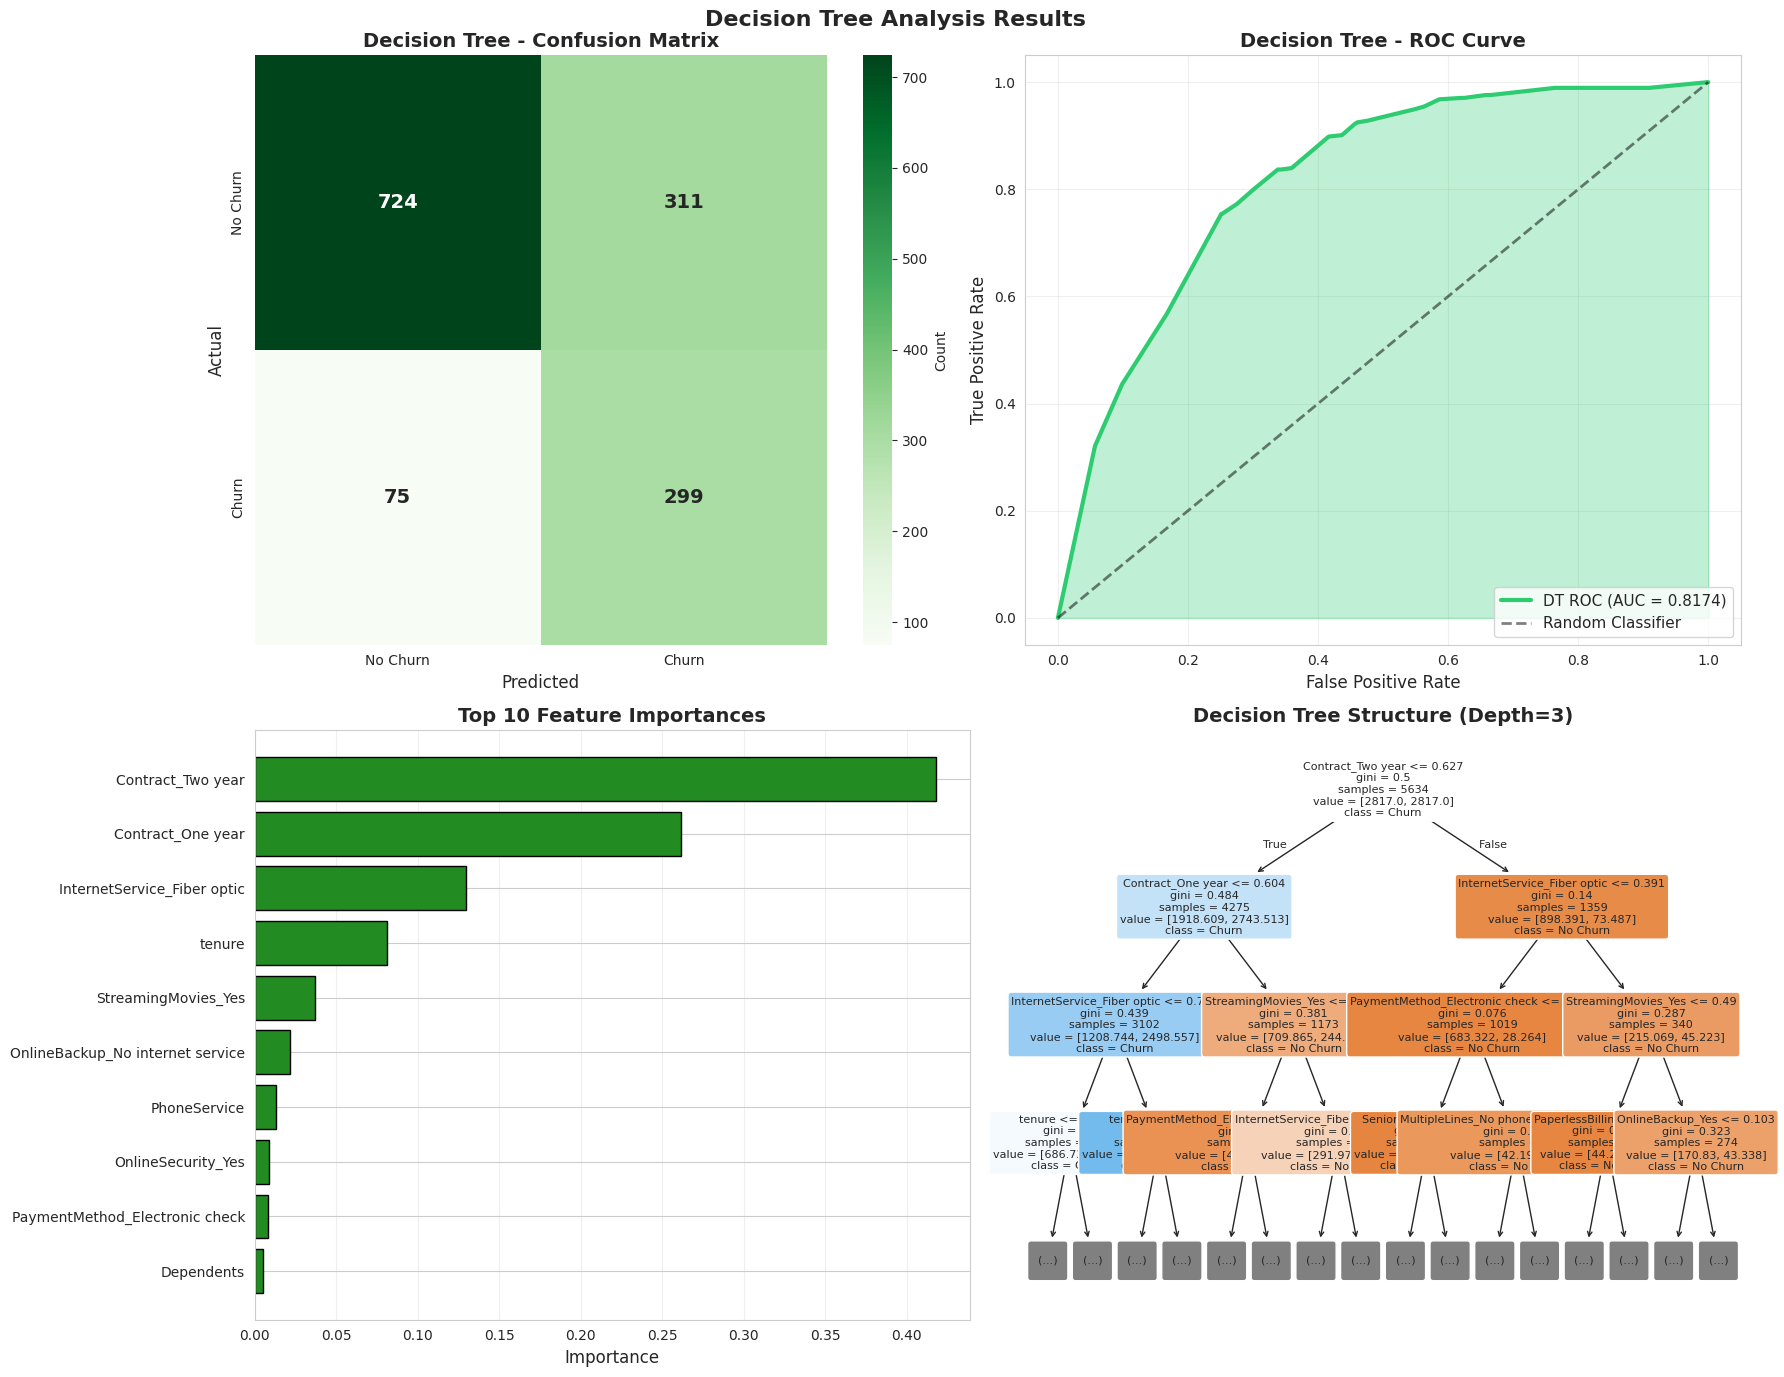

Decision Tree evaluation complete!


In [32]:
print("\n5. DECISION TREE RESULT VISUALIZATIONS")
print("-"*80)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=axes[0, 0],
           cbar_kws={'label': 'Count'},
           xticklabels=['No Churn', 'Churn'],
           yticklabels=['No Churn', 'Churn'],
           annot_kws={'size': 14, 'weight': 'bold'})
axes[0, 0].set_title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Actual', fontsize=12)
axes[0, 0].set_xlabel('Predicted', fontsize=12)

# ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
axes[0, 1].plot(fpr_dt, tpr_dt, linewidth=3, label=f'DT ROC (AUC = {roc_auc_dt:.4f})', color='#2ecc71')
axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier', alpha=0.5)
axes[0, 1].fill_between(fpr_dt, tpr_dt, alpha=0.3, color='#2ecc71')
axes[0, 1].set_title('Decision Tree - ROC Curve', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('False Positive Rate', fontsize=12)
axes[0, 1].set_ylabel('True Positive Rate', fontsize=12)
axes[0, 1].legend(loc='lower right', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# Feature Importance (Top 10)
top_features = feature_importance.head(10)
axes[1, 0].barh(top_features['feature'], top_features['importance'], color='forestgreen', edgecolor='black')
axes[1, 0].set_xlabel('Importance', fontsize=12)
axes[1, 0].set_title('Top 10 Feature Importances', fontsize=14, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# Decision Tree Structure (limited depth for visibility)
plot_tree(dt_model, max_depth=3, filled=True,
         feature_names=X.columns,
         class_names=['No Churn', 'Churn'],
         fontsize=8, ax=axes[1, 1], rounded=True)
axes[1, 1].set_title('Decision Tree Structure (Depth=3)', fontsize=14, fontweight='bold')

plt.suptitle('Decision Tree Analysis Results', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Decision Tree evaluation complete!")

**Cell 32: Model Comparison**

In [33]:
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Neural Network', 'Decision Tree'],
    'Accuracy': [accuracy_nn, accuracy_dt],
    'Precision': [precision_nn, precision_dt],
    'Recall': [recall_nn, recall_dt],
    'F1-Score': [f1_nn, f1_dt],
    'ROC-AUC': [roc_auc_nn, roc_auc_dt]
})

print("\nCOMPARATIVE PERFORMANCE METRICS:")
print("-"*80)
print(comparison_df.to_string(index=False))

# Determine winner
if roc_auc_nn > roc_auc_dt:
    winner = 'Neural Network'
    winner_auc = roc_auc_nn
    diff = roc_auc_nn - roc_auc_dt
else:
    winner = 'Decision Tree'
    winner_auc = roc_auc_dt
    diff = roc_auc_dt - roc_auc_nn

print("\n" + "="*80)
print(f"WINNER: {winner}")
print("="*80)
print(f"ROC-AUC: {winner_auc:.4f}")
print(f"Difference: {diff:.4f} ({diff*100:.2f}%)")


MODEL COMPARISON

COMPARATIVE PERFORMANCE METRICS:
--------------------------------------------------------------------------------
         Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Neural Network  0.730305   0.494983 0.791444  0.609053 0.834560
 Decision Tree  0.726047   0.490164 0.799465  0.607724 0.817417

WINNER: Neural Network
ROC-AUC: 0.8346
Difference: 0.0171 (1.71%)


**Cell 33: Side-by-Side Comparison Visualizations**


VISUAL MODEL COMPARISON


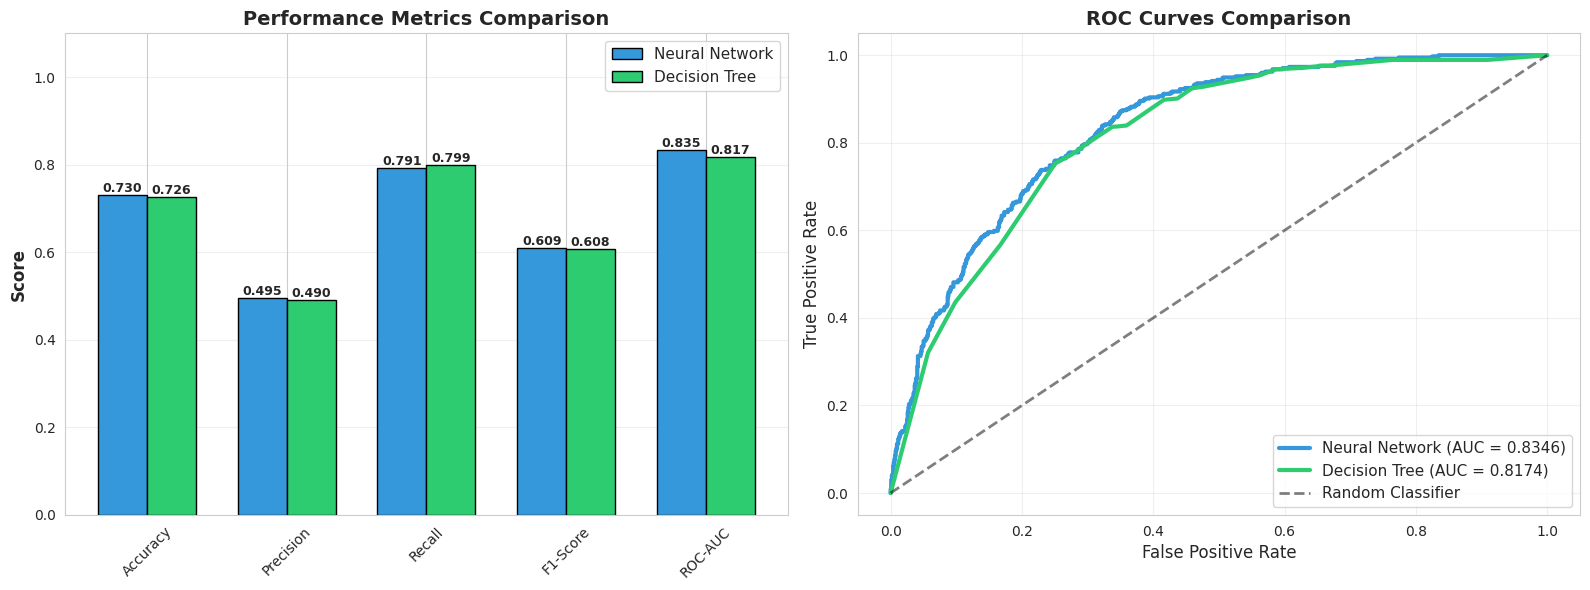


TASK 2 COMPLETE - MODEL IMPLEMENTATION DONE!


In [34]:
print("\n" + "="*80)
print("VISUAL MODEL COMPARISON")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
nn_scores = [accuracy_nn, precision_nn, recall_nn, f1_nn, roc_auc_nn]
dt_scores = [accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt]

x = np.arange(len(metrics))
width = 0.35

bars1 = axes[0].bar(x - width/2, nn_scores, width, label='Neural Network',
                    color='#3498db', edgecolor='black')
bars2 = axes[0].bar(x + width/2, dt_scores, width, label='Decision Tree',
                    color='#2ecc71', edgecolor='black')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0].set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics, rotation=45)
axes[0].legend(fontsize=11)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1.1])

# ROC Curves Comparison
axes[1].plot(fpr_nn, tpr_nn, linewidth=3,
            label=f'Neural Network (AUC = {roc_auc_nn:.4f})', color='#3498db')
axes[1].plot(fpr_dt, tpr_dt, linewidth=3,
            label=f'Decision Tree (AUC = {roc_auc_dt:.4f})', color='#2ecc71')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier', alpha=0.5)
axes[1].set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc='lower right', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTASK 2 COMPLETE - MODEL IMPLEMENTATION DONE!")
print("="*80)